In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 포지션별 데이터 파일 경로를 딕셔너리로 생성합니다.
position_files = {
    'Top': r"C:\Users\YOON02\Downloads\LOL_WINSUM.csv",
    'Mid': r'C:\Users\YOON02\Downloads\Mid_Position_Data.csv',
    'Bot': r'C:\Users\YOON02\Downloads\Bot_Position_Data.csv',
    'Support': r'C:\Users\YOON02\Downloads\Support_Position_Data.csv',
    'Jungle': r'C:\Users\YOON02\Downloads\Jungle_Position_Data.csv'
}

# 각 포지션에 대해 랜덤 포레스트 모델을 생성하고, 승률을 예측하는 함수
def train_random_forest_with_cv(position_name, file_path):
    # 데이터 로드
    data = pd.read_csv(file_path)
    
    # 범주형 변수를 원-핫 인코딩 (필요한 경우)
    data_encoded = pd.get_dummies(data)
    
    # feature와 target 설정
    X = data_encoded.drop(['result'], axis=1, errors='ignore')  # 'result'가 타겟 컬럼이라고 가정
    y = data['result']
    
    # 랜덤 포레스트 모델 생성
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # 5겹 교차 검증 수행
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # 교차 검증 결과 출력
    print(f'{position_name} Position - Cross-Validation Accuracy: {scores}')
    print(f'{position_name} Position - Mean Cross-Validation Accuracy: {scores.mean():.2f}')
    
    # 모델을 학습하고 반환 (추가적인 사용을 위해)
    model.fit(X, y)
    return model

# 모든 포지션에 대해 모델 훈련 및 5겹 교차 검증
models = {}
for position, file_path in position_files.items():
    print(f'Training model for {position} position with 5-fold cross-validation...')
    models[position] = train_random_forest_with_cv(position, file_path)

print("모든 포지션에 대한 교차 검증이 완료되었습니다.")


Training model for Top position with 5-fold cross-validation...
Top Position - Cross-Validation Accuracy: [0.86044273 0.86862368 0.84167469 0.85851781 0.85322425]
Top Position - Mean Cross-Validation Accuracy: 0.86
Training model for Mid position with 5-fold cross-validation...
Mid Position - Cross-Validation Accuracy: [0.94230769 0.96634615 0.94951923 0.96385542 0.93012048]
Mid Position - Mean Cross-Validation Accuracy: 0.95
Training model for Bot position with 5-fold cross-validation...
Bot Position - Cross-Validation Accuracy: [0.94711538 0.96394231 0.95192308 0.94939759 0.95662651]
Bot Position - Mean Cross-Validation Accuracy: 0.95
Training model for Support position with 5-fold cross-validation...
Support Position - Cross-Validation Accuracy: [0.93509615 0.96394231 0.93028846 0.94216867 0.96626506]
Support Position - Mean Cross-Validation Accuracy: 0.95
Training model for Jungle position with 5-fold cross-validation...
Jungle Position - Cross-Validation Accuracy: [0.92307692 0.94

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 포지션별 데이터 파일 경로를 딕셔너리로 생성합니다.
position_files = {
    'Top': r"C:\Users\YOON02\Downloads\LOL_WINSUM.csv",
    'Mid': r'C:\Users\YOON02\Downloads\Data_for_mid_Position (1).csv',
    'Bot': r'C:\Users\YOON02\Downloads\Data_for_bot_Position (1).csv',
    'Support': r'C:\Users\YOON02\Downloads\Data_for_sup_Position (1).csv',
    'Jungle': r'C:\Users\YOON02\Downloads\Data_for_jng_Position (1).csv'
}

# 각 포지션에 대해 랜덤 포레스트 모델을 생성하고, 피처 중요도 및 상관계수를 계산하는 함수
def analyze_feature_importance(position_name, file_path):
    # 데이터 로드
    data = pd.read_csv(file_path)
    
    # 범주형 변수를 원-핫 인코딩 (필요한 경우)
    data_encoded = pd.get_dummies(data)
    
    # feature와 target 설정
    X = data_encoded.drop(['result'], axis=1, errors='ignore')  # 'result'가 타겟 컬럼이라고 가정
    y = data['result']
    
    # 랜덤 포레스트 모델 생성 및 훈련
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # 피처 중요도 추출
    feature_importances = model.feature_importances_
    
    # 피처 중요도를 데이터프레임으로 저장
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    # 중요도 순으로 정렬
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # 상위 20개의 중요한 피처 선택
    top_features = importance_df.head(20)['Feature'].tolist()
    print(f'{position_name} Position - Top 10 Important Features:')
    print(importance_df.head(20))
    
    # 상위 피처들 간의  계산
    correlation_matrix = data_encoded[top_features].corr()
    
    return model, importance_df, correlation_matrix

# 모든 포지션에 대해 모델 훈련, 피처 중요도 계산
models = {}
importance_dfs = {}
correlation_matrices = {}
for position, file_path in position_files.items():
    print(f'Analyzing feature importance for {position} position...')
    model, importance_df, correlation_matrix = analyze_feature_importance(position, file_path)
    models[position] = model
    importance_dfs[position] = importance_df
    correlation_matrices[position] = correlation_matrix

print("모든 포지션에 대한 피처 중요도  분석이 완료되었습니다.")


Analyzing feature importance for Top position...
Top Position - Top 10 Important Features:
                            Feature  Importance
6                           assists    0.092495
37                 damage_per_death    0.068608
5                            deaths    0.058512
4                             kills    0.031959
42           total_win_contribution    0.031019
30                     golddiffat15    0.025756
31                       xpdiffat15    0.021579
39   normalized_attack_contribution    0.021386
14             damagetakenperminute    0.018530
41   normalized_vision_contribution    0.018453
11                damagetochampions    0.017957
12                              dpm    0.017776
27                         goldat15    0.017225
22                             vspm    0.016782
13                      damageshare    0.015256
38                     team_win_sum    0.014818
21                      visionscore    0.014758
23                         total cs    0.0140

In [15]:
import pandas as pd

# 데이터 로드
data = pd.read_csv(r'C:\Users\YOON02\Downloads\Top_Position_Data.csv')

# 개인화된 피처와 승률 간의 상관관계 분석
personal_features = ['kills', 'deaths', 'assists', 'golddiffat15', 'earned gpm', 'goldspent', 'cspm']
correlation_matrix = data[personal_features + ['result']].corr()

# 결과 출력: 피처와 승리 여부 간의 상관관계
print(correlation_matrix['result'].sort_values(ascending=False))


result          1.000000
assists         0.592317
earned gpm      0.588038
kills           0.415556
golddiffat15    0.284995
goldspent       0.208123
cspm            0.173047
deaths         -0.530887
Name: result, dtype: float64


In [77]:
import pandas as pd

# 데이터 파일 로드 (경로를 제공된 파일 경로로 수정)
file_path = r"C:\Users\YOON02\Downloads\Updated_LoL_Major_Leagues_Data_Cleaned_No10Min.csv"
data = pd.read_csv(file_path)

# 숫자형 데이터만 선택 (문자열 또는 범주형 데이터 제외)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 주요 지표 확인 (numeric_data에 주요 지표가 포함되어 있는지 확인)
key_columns = ['damagetochampions']
available_columns = [col for col in key_columns if col in numeric_data.columns]

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 특정 열과의 상관관계 추출 (available_columns와의 상관관계)
relevant_correlations = correlation_matrix[available_columns]

# 상관관계 값들을 절대값 기준으로 정렬하여 상위 20개 피처만 추출
top_correlations = relevant_correlations.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# 상관관계가 높은 상위 20개의 피처들을 표시
print(top_correlations)


damagetochampions  damagetochampions    1.000000
                   dpm                  0.947630
                   damageshare          0.791299
                   total cs             0.722688
                   minionkills          0.671729
                   kills                0.623584
                   cspm                 0.600975
                   csat15               0.581515
                   goldat15             0.564198
                   xpat15               0.460149
dtype: float64


In [76]:
import pandas as pd

# 데이터 파일 로드 (경로를 제공된 파일 경로로 수정)
file_path = r"C:\Users\YOON02\Downloads\Updated_LoL_Major_Leagues_Data_Cleaned_No10Min.csv"
data = pd.read_csv(file_path)

# 숫자형 데이터만 선택 (문자열 또는 범주형 데이터 제외)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 주요 지표 확인 (numeric_data에 주요 지표가 포함되어 있는지 확인)
key_columns = ['damagetakenperminute']
available_columns = [col for col in key_columns if col in numeric_data.columns]

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 특정 열과의 상관관계 추출 (available_columns와의 상관관계)
relevant_correlations = correlation_matrix[available_columns]

# 상관관계 값들을 절대값 기준으로 정렬하여 상위 20개 피처만 추출
top_correlations = relevant_correlations.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# 상관관계가 높은 상위 20개의 피처들을 표시
print(top_correlations)


damagetakenperminute  damagetakenperminute        1.000000
                      damagemitigatedperminute    0.747392
                      monsterkills                0.499260
                      xpat15                      0.302499
                      deaths                      0.301673
                      csat15                      0.206404
                      goldat15                    0.176369
                      total cs                    0.135341
                      deathsat15                  0.127310
                      cspm                        0.106838
dtype: float64


In [82]:
import pandas as pd

# 데이터 파일 로드 (경로를 제공된 파일 경로로 수정)
file_path = r"C:\Users\YOON02\Downloads\Updated_LoL_Major_Leagues_Data_Cleaned_No10Min.csv"
data = pd.read_csv(file_path)

# 숫자형 데이터만 선택 (문자열 또는 범주형 데이터 제외)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 주요 지표 확인 (numeric_data에 주요 지표가 포함되어 있는지 확인)
key_columns = ['visionscore']
available_columns = [col for col in key_columns if col in numeric_data.columns]

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 특정 열과의 상관관계 추출 (available_columns와의 상관관계)
relevant_correlations = correlation_matrix[available_columns]

# 상관관계 값들을 절대값 기준으로 정렬하여 상위 20개 피처만 추출
top_correlations = relevant_correlations.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# 상관관계가 높은 상위 20개의 피처들을 표시
print(top_correlations)


visionscore  visionscore           1.000000
             wardsplaced           0.807789
             wpm                   0.749179
             controlwardsbought    0.745419
             wardskilled           0.633137
             wcpm                  0.567825
             assists               0.372977
             assistsat15           0.202360
             firstbloodassist      0.121449
             result                0.091807
dtype: float64


In [161]:
import pandas as pd

# CSV 파일 로드
file_path = r"C:\Users\YOON02\Downloads\dpmd포함 정규화.csv"
data = pd.read_csv(file_path)

# attack, gold, fifteen 컬럼 생성
data['attack'] = data['assists'] + data['kills'] + data['inhibitors'] + data['dpm']
data['gold'] = data['earned gpm'] + data['earnedgold'] + data['totalgold']

# 'fifteen' 컬럼은 양수 값만 더하도록 설정
data['fifteen'] = (
    data['golddiffat15'].apply(lambda x: x if x > 0 else 0) + 
    data['xpdiffat15'].apply(lambda x: x if x > 0 else 0) + 
    data['csdiffat15'].apply(lambda x: x if x > 0 else 0)
)

# dpmd가 높을수록 더 많은 피해를 흡수했으므로 좋은 디펜스 성능으로 판단
position_group = data.groupby('position')[['attack', 'gold', 'fifteen', 'dpmd']].mean()

# 각 항목에 대해 랭킹 계산 (디펜스는 dpmd가 높을수록 좋은 성능)
position_group['attack_rank'] = position_group['attack'].rank(ascending=False)
position_group['gold_rank'] = position_group['gold'].rank(ascending=False)
position_group['fifteen_rank'] = position_group['fifteen'].rank(ascending=False)
position_group['defense_rank'] = position_group['dpmd'].rank(ascending=False)  # dpmd가 높을수록 상위

# 최종 순위를 각 랭킹의 평균으로 계산하고 소수점 7자리까지 반영
position_group['final_rank'] = position_group[['attack_rank', 'gold_rank', 'fifteen_rank', 'defense_rank']].mean(axis=1).round(7)

# 포지션별 랭킹 출력 (소수점 7자리까지 반영)
pd.set_option('display.float_format', lambda x: f'{x:.1f}')
print(position_group[['attack_rank', 'gold_rank', 'fifteen_rank', 'defense_rank', 'final_rank']])


          attack_rank  gold_rank  fifteen_rank  defense_rank  final_rank
position                                                                
bot               1.0        1.0           2.0           5.0         2.2
jng               4.0        4.0           4.0           1.0         3.2
mid               2.0        2.0           3.0           3.0         2.5
sup               5.0        5.0           5.0           4.0         4.8
top               3.0        3.0           1.0           2.0         2.2


상관관계 분석

C:\Users\YOON02\AppData\Local\Temp\ipykernel_20488\3396756967.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


타겟과의 상관관계 상위 10개 (내림차순 정렬):
assists                          0.5618160
damage_per_death                 0.4174978
kills                            0.3711235
total_win_contribution           0.3417127
golddiffat15                     0.3345721
xpdiffat15                       0.2633416
team_win_sum                     0.2336882
dpm                              0.2064723
normalized_attack_contribution   0.2015996
csdiffat15                       0.1885384
dtype: float64

모든 수치형 피처를 사용한 모델의 정확도: 0.8912

피처 중요도 상위 10개 (내림차순 정렬):
                           Feature  Importance
6                          assists   0.2115049
5                           deaths   0.1296828
37                damage_per_death   0.0966965
4                            kills   0.0538063
42          total_win_contribution   0.0434988
30                    golddiffat15   0.0278484
41  normalized_vision_contribution   0.0240290
12                             dpm   0.0217454
39  normalized_attack_contribution   0.0210813

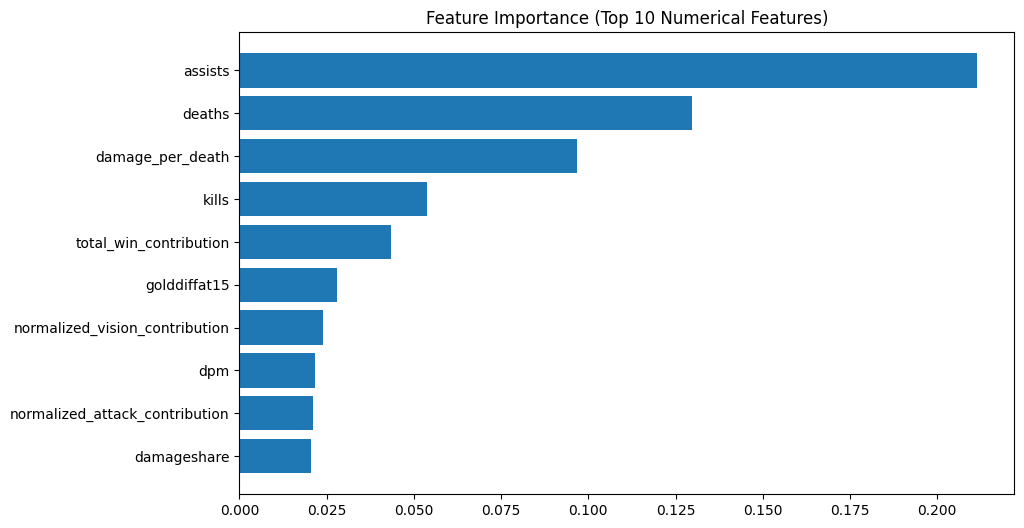

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path = r"C:\Users\YOON02\Downloads\LOL_WINSUM.csv"
data = pd.read_csv(file_path)

# 범주형 피처를 제외한 수치형 피처만 선택
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# 타겟 피처 제외
numerical_features = [col for col in numerical_features if col != 'result']

# 입력 데이터와 결과 데이터 (result) 설정
X = data[numerical_features]
y = data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X.fillna(0, inplace=True)

# 1. 상관관계 계산
correlations = X.corrwith(y)

# 상관관계를 내림차순으로 정렬하고 상위 10개만 출력
correlations_sorted = correlations.sort_values(ascending=False).head(10)
print("타겟과의 상관관계 상위 10개 (내림차순 정렬):")
print(correlations_sorted)

# 2. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 5. 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모든 수치형 피처를 사용한 모델의 정확도: {accuracy:.4f}")

# 6. 피처 중요도 추출
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 10개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("\n피처 중요도 상위 10개 (내림차순 정렬):")
print(feature_importance_sorted)

# 7. 피처 중요도 시각화 (상위 10개)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Top 10 Numerical Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


시야 기여도 상관관계

킬 대비 어시스트

In [2]:
import pandas as pd

# 파일 불러오기
file_path = r"C:\Users\YOON02\Downloads\cleaned_15_min_data_with_updated_ka.csv"  # 파일 경로 설정
data = pd.read_csv(file_path)

# 총 kills와 assists 합 계산
total_kills = data['kills'].sum()
total_assists = data['assists'].sum()

# 킬당 평균 어시스트 계산
overall_assists_per_kill = total_assists / total_kills

# 결과 출력
print(f"킬당 평균 어시스트: {overall_assists_per_kill}")


킬당 평균 어시스트: 2.3631951782709093


In [49]:
import pandas as pd

# 데이터 파일 로드
file_path = r"C:\Users\YOON02\Downloads\2024_민맥스.csv"
data = pd.read_csv(file_path)

# 포지션별 공격, 골드, 라인전, 디펜스 기여도 순위 (이미지에 맞춰 수정)
position_rankings = pd.DataFrame({
    'position': ['bot', 'jng', 'mid', 'sup', 'top'],
    'Attack_Rank': [1, 4, 2, 5, 3],   # 이미지에 맞춘 순위
    'Gold_Rank': [1, 4, 2, 5, 3],     # 이미지에 맞춘 순위
    'Fifteen_Rank': [2, 4, 3, 5, 1],  # 이미지에 맞춘 순위
    'Defense_Rank': [5, 1, 3, 4, 2]   # 이미지에 맞춘 순위
})

# 가중치 계산: 순위가 높을수록 가중치가 높음 (1위는 0.6, 2위는 0.5, ..., 5위는 0.2)
weight_mapping = {1: 0.6, 2: 0.5, 3: 0.4, 4: 0.3, 5: 0.2}
position_rankings['Attack_Weight'] = position_rankings['Attack_Rank'].map(weight_mapping)
position_rankings['Gold_Weight'] = position_rankings['Gold_Rank'].map(weight_mapping)
position_rankings['Fifteen_Weight'] = position_rankings['Fifteen_Rank'].map(weight_mapping)
position_rankings['Defense_Weight'] = position_rankings['Defense_Rank'].map(weight_mapping)

# 데이터와 포지션별 공격, 골드, 라인전, 디펜스 기여도 순위를 병합하여 각 포지션의 가중치 적용
data = pd.merge(data, position_rankings, on='position', how='left')

# 공격 기여도 계산: assists, kills, inhibitors, dpm의 합
data['attack_contribution'] = data['assists'] + data['kills'] + data['inhibitors'] + data['dpm']

# 골드 기여도 계산: earned gpm, earnedgold, totalgold의 합
data['gold_contribution'] = data['earned gpm'] + data['earnedgold'] + data['totalgold']

# 라인전 기여도 계산: golddiffat15, xpdiffat15, csdiffat15의 합
data['fifteen_contribution'] = data['golddiffat15'] + data['xpdiffat15'] + data['csdiffat15']

# 디펜스 기여도 계산: dpmd
data['defense_contribution'] = data['dpmd']

# 포지션별 가중치를 적용하여 최종 공격, 골드, 라인전, 디펜스 기여도 계산
data['final_attack_contribution'] = data['attack_contribution'] * data['Attack_Weight']
data['final_gold_contribution'] = data['gold_contribution'] * data['Gold_Weight']
data['final_fifteen_contribution'] = data['fifteen_contribution'] * data['Fifteen_Weight']
data['final_defense_contribution'] = data['defense_contribution'] * data['Defense_Weight']

# 팀별 총 게임 수에 따른 기여도 계산 (teamgamesum 사용)
data['normalized_attack_contribution'] = data['final_attack_contribution'] / data['teamgamesum']
data['normalized_gold_contribution'] = data['final_gold_contribution'] / data['teamgamesum']
data['normalized_fifteen_contribution'] = data['final_fifteen_contribution'] / data['teamgamesum']
data['normalized_defense_contribution'] = data['final_defense_contribution'] / data['teamgamesum']

# 총 승리 기여도 계산: 공격, 골드, 라인전, 디펜스 기여도의 합
data['total_win_contribution'] = (
    data['normalized_attack_contribution'] + 
    data['normalized_gold_contribution'] + 
    data['normalized_fifteen_contribution'] + 
    data['normalized_defense_contribution']
)

# 선수별 공격, 골드, 라인전, 디펜스, 총 승리 기여도 결과 확인 (첫 10행만 출력)
player_contribution = data[['playername', 'position', 'teamname', 'normalized_attack_contribution', 
                            'normalized_gold_contribution', 'normalized_fifteen_contribution',
                            'normalized_defense_contribution', 'total_win_contribution']]

# 결과 출력 (첫 10행만 화면에 출력)
print(player_contribution.head(10))

# 전체 데이터를 CSV 파일로 저장
player_contribution.to_csv(r'C:\Users\YOON02\Downloads\2024_민맥스_Contribution_Defense.csv', index=False)


    playername position    teamname  normalized_attack_contribution  \
0         Adam      top    Team BDS                        0.002192   
1         Sheo      jng    Team BDS                        0.000921   
2          nuc      mid    Team BDS                        0.002095   
3          Ice      bot    Team BDS                        0.002042   
4       Labrov      sup    Team BDS                        0.000502   
5  BrokenBlade      top  G2 Esports                        0.003786   
6         Yike      jng  G2 Esports                        0.001648   
7         Caps      mid  G2 Esports                        0.005105   
8    Hans Sama      bot  G2 Esports                        0.005319   
9        Mikyx      sup  G2 Esports                        0.000855   

   normalized_gold_contribution  normalized_fifteen_contribution  \
0                      0.005615                         0.012212   
1                      0.002823                         0.005464   
2             

C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\258756594.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


타겟과의 상관관계 상위 30개 (내림차순 정렬, 절대값):
assists                     0.561816
deaths                      0.521723
earned gpm                  0.373746
kills                       0.371124
inhibitors                  0.357737
golddiffat15                0.330519
earnedgold                  0.318850
totalgold                   0.288050
xpdiffat15                  0.260045
dpm                         0.206472
csdiffat15                  0.186771
damagetochampions           0.171379
goldspent                   0.157622
firstblood                  0.139146
teamgamesum                 0.128498
vspm                        0.110078
damagetakenperminute        0.104235
visionscore                 0.091807
wcpm                        0.091691
firstbloodvictim            0.086017
wardskilled                 0.078597
participantid               0.066180
cspm                        0.054218
monsterkills                0.054210
dpmd                        0.053844
total cs                    0.046799
wpm  

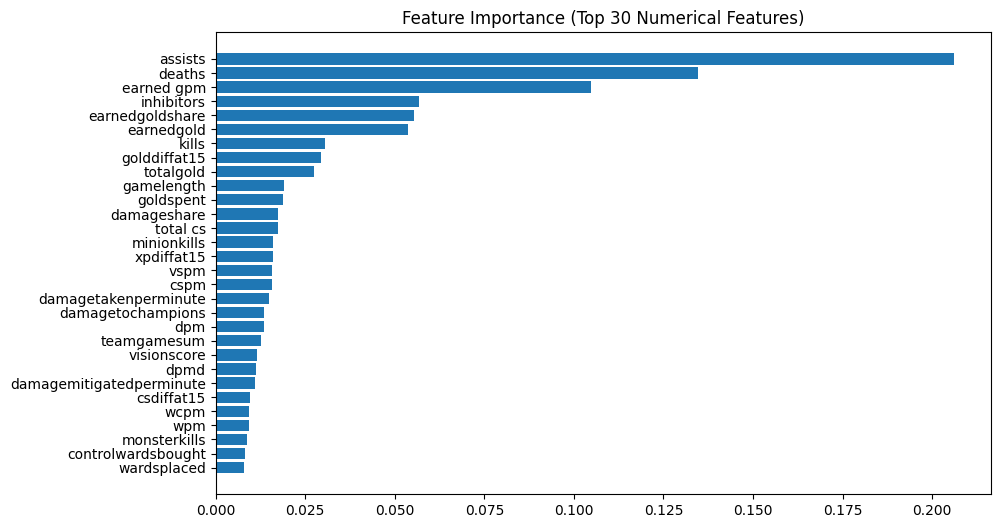

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path = r"C:\Users\YOON02\Downloads\15분_정규화_필터링_데이터_DPMD.csv"
data = pd.read_csv(file_path)

# 범주형 피처를 제외한 수치형 피처만 선택
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# 타겟 피처 제외
numerical_features = [col for col in numerical_features if col != 'result']

# 입력 데이터와 결과 데이터 (result) 설정
X = data[numerical_features]
y = data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X.fillna(0, inplace=True)

# 1. 상관관계 계산 (절대값 사용)
correlations = X.corrwith(y).abs()  # 절대값 처리

# 상관관계를 내림차순으로 정렬하고 상위 30개만 출력
correlations_sorted = correlations.sort_values(ascending=False).head(30)
print("타겟과의 상관관계 상위 30개 (내림차순 정렬, 절대값):")
print(correlations_sorted)

# 2. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 5. 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모든 수치형 피처를 사용한 모델의 정확도: {accuracy:.4f}")

# 6. 피처 중요도 추출
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 30개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False).head(30)
print("\n피처 중요도 상위 30개 (내림차순 정렬):")
print(feature_importance_sorted)

# 7. 피처 중요도 시각화 (상위 10개)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Top 30 Numerical Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


In [183]:
import pandas as pd

# 데이터 로드
file_path = r"C:\Users\YOON02\Downloads\KDA 1더한후 정규화 (2).csv"
data = pd.read_csv(file_path)

# 수치형 피처만 선택 (kda 포함)
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# kda와 나머지 피처들 간의 상관관계 계산
correlations_with_kda = data[numerical_features].corr()['result'].drop('result')  # kda 본인 제외

# 양의 상관관계 상위 10개
positive_correlations = correlations_with_kda[correlations_with_kda > 0].sort_values(ascending=False).head(10)

# 음의 상관관계 상위 10개
negative_correlations = correlations_with_kda[correlations_with_kda < 0].sort_values(ascending=True).head(10)

# 출력
print("kda와 양의 상관관계 상위 10개 (내림차순 정렬):")
print(positive_correlations)

print("\nkda와 음의 상관관계 상위 10개 (내림차순 정렬):")
print(negative_correlations)


kda와 양의 상관관계 상위 10개 (내림차순 정렬):
kda                      0.6
assists                  0.6
total_win_contribution   0.5
earned gpm               0.4
kills                    0.4
inhibitors               0.4
golddiffat15             0.3
earnedgold               0.3
totalgold                0.3
xpdiffat15               0.3
Name: result, dtype: float64

kda와 음의 상관관계 상위 10개 (내림차순 정렬):
deaths                 -0.5
damagetakenperminute   -0.1
firstbloodvictim       -0.1
participantid          -0.1
damageshare            -0.0
playoffs               -0.0
patch                  -0.0
game                   -0.0
Name: result, dtype: float64


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\4178373407.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\YOON02\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


타겟과의 양의 상관관계 상위 10개 (내림차순 정렬):
assists              0.56182
earned gpm           0.37375
kills                0.37112
inhibitors           0.35774
golddiffat15         0.33052
totalgold            0.28805
dpm                  0.20647
damagetochampions    0.17138
firstblood           0.13915
teamgamesum          0.12850
dtype: float64

타겟과의 음의 상관관계 상위 10개 (내림차순 정렬):
deaths                 -0.52172
damagetakenperminute   -0.10424
firstbloodvictim       -0.08602
participantid          -0.06618
damageshare            -0.00000
gamelength             -0.00000
game                   -0.00000
playoffs               -0.00000
dtype: float64

모든 수치형 피처를 사용한 모델의 정확도: 0.9269

피처 중요도 상위 10개 (내림차순 정렬):
            Feature  Importance
8           assists    0.206418
7            deaths    0.137611
25       earned gpm    0.118267
26  earnedgoldshare    0.059459
11       inhibitors    0.053798
6             kills    0.041748
24        totalgold    0.038976
31     golddiffat15    0.030024
5        gamele

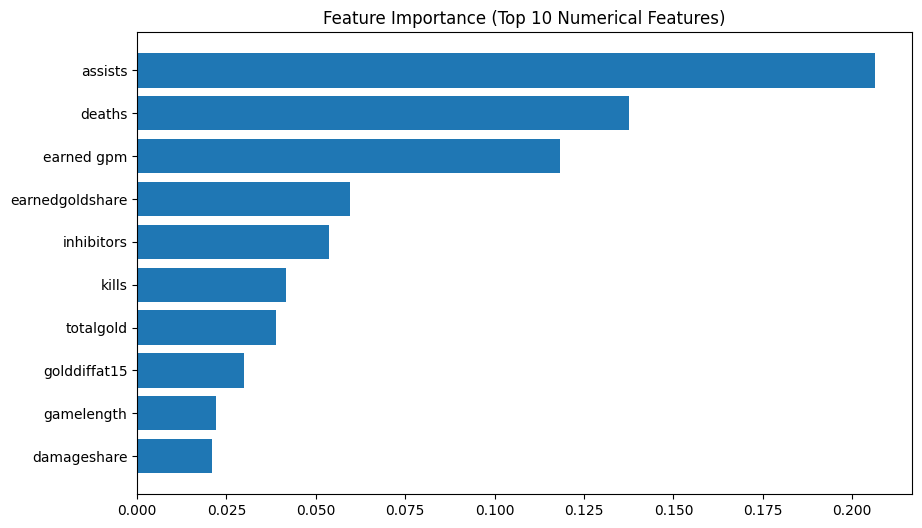

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path = r"C:\Users\YOON02\Downloads\15분_정규화_필터링_데이터_DPMD.csv"
data = pd.read_csv(file_path)

# 제외할 피처 리스트 (예시)
exclude_columns = ['kda','csdiffat15','earnedgold','xpdiffat15','goldspent']  # 제외하고 싶은 피처 이름을 리스트에 추가

# 범주형 피처를 제외한 수치형 피처만 선택
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# 제외할 피처를 리스트에서 제거
numerical_features = [col for col in numerical_features if col not in exclude_columns]

# 타겟 피처 제외
numerical_features = [col for col in numerical_features if col != 'result']

# 입력 데이터와 결과 데이터 (result) 설정
X = data[numerical_features]
y = data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X.fillna(0, inplace=True)

# 1. 상관관계 계산
correlations = X.corrwith(y)

# 양의 상관관계 상위 10개
positive_correlations = correlations[correlations > 0].sort_values(ascending=False).head(10)

# 음의 상관관계 상위 10개
negative_correlations = correlations[correlations < 0].sort_values(ascending=True).head(10)

# 출력 (소수점 4자리로 고정)
print("타겟과의 양의 상관관계 상위 10개 (내림차순 정렬):")
print(positive_correlations.round(5))

print("\n타겟과의 음의 상관관계 상위 10개 (내림차순 정렬):")
print(negative_correlations.round(5))

# 2. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 5. 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모든 수치형 피처를 사용한 모델의 정확도: {accuracy:.4f}")

# 6. 피처 중요도 추출
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 10개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("\n피처 중요도 상위 10개 (내림차순 정렬):")
print(feature_importance_sorted)

# 7. 피처 중요도 시각화 (상위 10개)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Top 10 Numerical Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


타겟과의 상관관계 상위 10개 (내림차순 정렬):
assists         0.561816
earned gpm      0.373746
kills           0.371124
inhibitors      0.357737
golddiffat15    0.334572
earnedgold      0.318850
totalgold       0.288050
xpdiffat15      0.263342
dpm             0.206472
csdiffat15      0.188538
dtype: float64

모든 수치형 피처를 사용한 로지스틱 회귀 모델의 정확도: 0.8823

피처 중요도 상위 10개 (내림차순 정렬):
         Feature  Importance
0        assists    8.169471
1     earned gpm    6.948399
3     inhibitors    4.499449
8            dpm    3.020157
6      totalgold    2.479297
2          kills    1.466648
4   golddiffat15    1.356016
5     earnedgold    0.622530
7     xpdiffat15    0.616775
10          dpmd    0.188115


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\3350232630.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


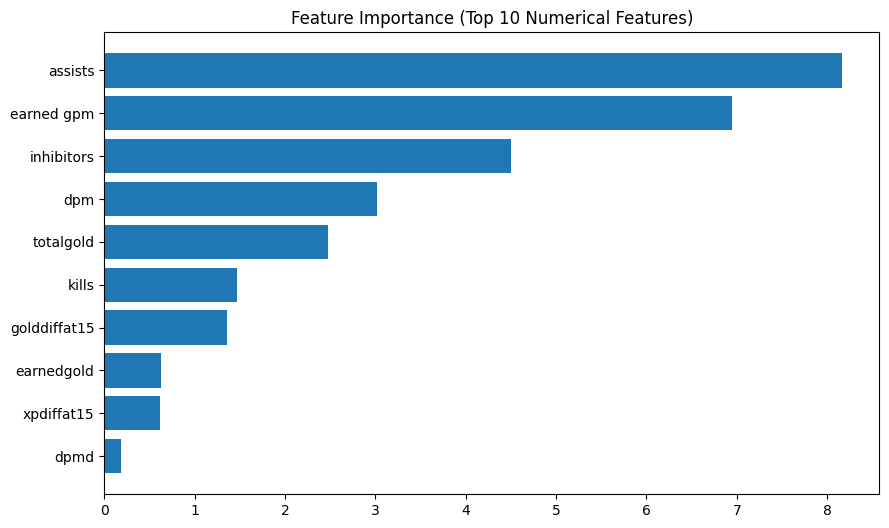

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path = r"C:\Users\YOON02\Downloads\상위10개.csv"
data = pd.read_csv(file_path)

# 범주형 피처를 제외한 수치형 피처만 선택
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# 타겟 피처 제외
numerical_features = [col for col in numerical_features if col != 'result']

# 입력 데이터와 결과 데이터 (result) 설정
X = data[numerical_features]
y = data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X.fillna(0, inplace=True)

# 1. 상관관계 계산
correlations = X.corrwith(y)

# 상관관계를 내림차순으로 정렬하고 상위 10개만 출력
correlations_sorted = correlations.sort_values(ascending=False).head(10)
print("타겟과의 상관관계 상위 10개 (내림차순 정렬):")
print(correlations_sorted)

# 2. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter는 수렴을 위한 반복 횟수
model.fit(X_train, y_train)

# 4. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 5. 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모든 수치형 피처를 사용한 로지스틱 회귀 모델의 정확도: {accuracy:.4f}")

# 6. 피처 중요도 추출
importances = abs(model.coef_[0])  # 로지스틱 회귀에서는 절대값으로 중요도를 추출
feature_importance = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 10개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("\n피처 중요도 상위 10개 (내림차순 정렬):")
print(feature_importance_sorted)

# 7. 피처 중요도 시각화 (상위 10개)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Top 10 Numerical Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트 모델 임포트
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# 데이터 로드
file_path_2023 = r"C:\Users\YOON02\Downloads\15분_정규화_필터링_데이터_DPMD.csv"
file_path_2024 = r"C:\Users\YOON02\Downloads\2024_민맥스.csv"

train_data = pd.read_csv(file_path_2023)
test_data = pd.read_csv(file_path_2024)

# 사용할 피처 고정
selected_features = ['assists', 'earned gpm', 'kills', 'inhibitors', 'golddiffat15', 
                     'earnedgold', 'totalgold', 'xpdiffat15', 'dpm', 'csdiffat15', 'deaths', 'damagetakenperminute']

# 학습용 데이터 (2023년도)와 평가용 데이터 (2024년도) 설정
X_train = train_data[selected_features]
y_train = train_data['result']

# 결측치 처리
X_train.fillna(0, inplace=True)

# 시간 기반 교차 검증 설정
tscv = TimeSeriesSplit(n_splits=5)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 성능 기록
accuracies = []

# 시계열 교차 검증
for train_index, val_index in tscv.split(X_train):
    X_train_cv, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # 모델 학습
    model.fit(X_train_cv, y_train_cv)
    
    # 예측
    y_pred = model.predict(X_val)
    
    # 정확도 평가
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

print(f"시계열 교차 검증 정확도: {accuracies}")
print(f"평균 정확도: {sum(accuracies) / len(accuracies):.4f}")

# 2024년도 데이터로 최종 모델 평가
X_test = test_data[selected_features]
y_test = test_data['result']
X_test.fillna(0, inplace=True)

# 전체 데이터로 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_test_pred = model.predict(X_test)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"\n2024년도 데이터를 사용한 랜덤 포레스트 모델의 성능 평가:")
print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 점수: {f1:.4f}")


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\2652321761.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)


시계열 교차 검증 정확도: [0.9145002888503755, 0.8960138648180243, 0.8965915655690352, 0.9185441941074524, 0.9064124783362218]
평균 정확도: 0.9064


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\2652321761.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)



2024년도 데이터를 사용한 랜덤 포레스트 모델의 성능 평가:
정확도: 0.8783
정밀도: 0.8439
재현율: 0.9282
F1 점수: 0.8841



5겹 교차 검증 정확도: [0.90952839 0.91434071 0.89509143 0.91434071 0.9080847 ]
평균 정확도: 0.9083

2024년도 데이터를 사용한 로지스틱 회귀 모델의 성능 평가:
정확도: 0.8847
정밀도: 0.8451
재현율: 0.9421
F1 점수: 0.8910

피처 중요도 (내림차순 정렬):
                 Feature  Importance
0                assists   15.414220
10                deaths    8.659787
1             earned gpm    7.941074
3             inhibitors    7.061124
2                  kills    4.201495
8                    dpm    3.506822
6              totalgold    2.827961
9             csdiffat15    1.040233
4           golddiffat15    0.876103
7             xpdiffat15    0.822215
11  damagetakenperminute    0.470356
5             earnedgold    0.380959


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\2189439703.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\2189439703.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


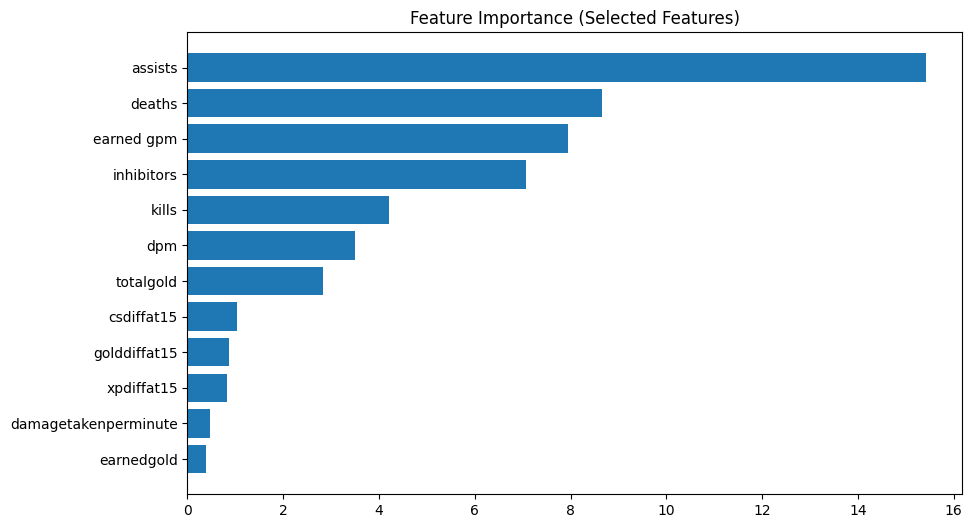

In [63]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path_2023 = r"C:\Users\YOON02\Downloads\15분_정규화_필터링_데이터_DPMD.csv"
file_path_2024 = r"C:\Users\YOON02\Downloads\2024_민맥스.csv"


train_data = pd.read_csv(file_path_2023)
test_data = pd.read_csv(file_path_2024)

# 사용할 피처 고정
selected_features = ['assists', 'earned gpm', 'kills', 'inhibitors', 'golddiffat15', 
                     'earnedgold', 'totalgold', 'xpdiffat15', 'dpm', 'csdiffat15', 'deaths', 'damagetakenperminute']

# 학습용 데이터 (2023년도) 설정
X_train = train_data[selected_features]
y_train = train_data['result']

# 테스트 데이터 (2024년도) 설정
X_test = test_data[selected_features]
y_test = test_data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# 1. 2023년도 학습 데이터에 대해 5겹 교차 검증 수행
model = LogisticRegression(random_state=42, max_iter=1000)

# 5겹 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5겹 교차 검증
print(f"\n5겹 교차 검증 정확도: {cv_scores}")
print(f"평균 정확도: {cv_scores.mean():.4f}")

# 2. 전체 2023년도 데이터로 모델 학습
model.fit(X_train, y_train)

# 3. 2024년도 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 4. 성능 평가 지표 계산 및 출력 (정확도, 정밀도, 재현율, F1 점수)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n2024년도 데이터를 사용한 로지스틱 회귀 모델의 성능 평가:")
print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 점수: {f1:.4f}")

# 5. 피처 중요도 추출
importances = abs(model.coef_[0])  # 로지스틱 회귀에서는 절대값으로 중요도를 추출
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 10개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)
print("\n피처 중요도 (내림차순 정렬):")
print(feature_importance_sorted)

# 6. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Selected Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


In [167]:
import pandas as pd

# 데이터 파일 읽기
file_path = r"C:\Users\YOON02\Downloads\15분 데이터.csv"  # 파일 경로에 맞게 수정
data = pd.read_csv(file_path)

# 데스에 1을 더해서 0으로 나누는 것을 방지
data['adjusted_deaths'] = data['deaths'] + 1

# 데스 당 받은 피해량(DPMD) 계산
data['dpmd'] = data['damagetakenperminute'] / data['adjusted_deaths']

# DPMD 정규화 (-1 ~ 1)
dpmd_min = data['dpmd'].min()
dpmd_max = data['dpmd'].max()
data['normalized_dpmd'] = 2 * ((data['dpmd'] - dpmd_min) / (dpmd_max - dpmd_min)) - 1

# 결과 저장
output_file_path = r"C:\Users\YOON02\Downloads\2023dpmd_lol_lck_lcs_lec_data.csv"  # 저장할 파일 경로에 맞게 수정
data.to_csv(output_file_path, index=False)

print("정규화된 DPMD 데이터가 저장되었습니다:", output_file_path)


정규화된 DPMD 데이터가 저장되었습니다: C:\Users\YOON02\Downloads\2023dpmd_lol_lck_lcs_lec_data.csv


C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\3543206067.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\YOON02\AppData\Local\Temp\ipykernel_20632\3543206067.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


5겹 교차 검증 정확도: [0.90712223 0.91674687 0.89942252 0.9172281  0.91049086]
평균 정확도: 0.9102
랜덤 포레스트 모델의 정확도: 0.8784

피처 중요도 (내림차순 정렬):
                 Feature  Importance
0                assists    0.282238
10                deaths    0.185448
1             earned gpm    0.124264
5             earnedgold    0.062657
3             inhibitors    0.062365
2                  kills    0.047802
6              totalgold    0.045969
4           golddiffat15    0.044144
11  damagetakenperminute    0.044084
8                    dpm    0.038630
7             xpdiffat15    0.034387
9             csdiffat15    0.028010


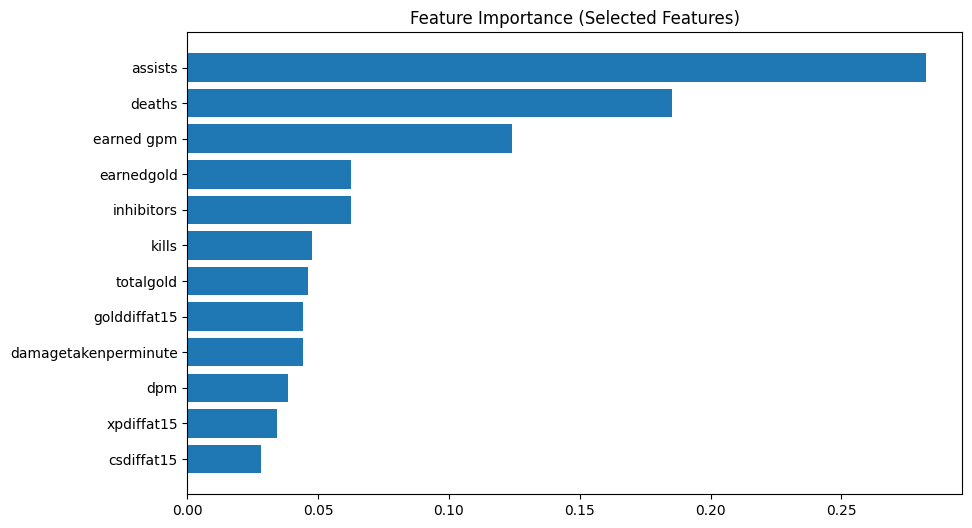

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path_2023 = r"C:\Users\YOON02\Downloads\2023_dpmd포함 정규화.csv"
file_path_2024 = r"C:\Users\YOON02\Downloads\2024_Game_Sum.csv"

train_data = pd.read_csv(file_path_2023)
test_data = pd.read_csv(file_path_2024)

# 사용할 피처 고정
selected_features = ['assists', 'earned gpm', 'kills', 'inhibitors', 'golddiffat15', 
                     'earnedgold', 'totalgold', 'xpdiffat15', 'dpm', 'csdiffat15', 'deaths', 'damagetakenperminute']

# 학습용 데이터 (2023년도)와 평가용 데이터 (2024년도) 설정
X_train = train_data[selected_features]
y_train = train_data['result']

X_test = test_data[selected_features]
y_test = test_data['result']

# 결측치 처리 (간단히 결측치는 0으로 채움)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# 2. 랜덤 포레스트 모델 생성
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 3. 5겹 교차 검증 수행
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5겹 교차 검증

# 4. 교차 검증 결과 출력
print(f"5겹 교차 검증 정확도: {cv_scores}")
print(f"평균 정확도: {cv_scores.mean():.4f}")

# 5. 전체 데이터로 모델 학습
model.fit(X_train, y_train)

# 6. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 7. 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 모델의 정확도: {accuracy:.4f}")

# 8. 피처 중요도 추출
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# 피처 중요도를 내림차순으로 정렬하고 상위 10개만 출력
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)
print("\n피처 중요도 (내림차순 정렬):")
print(feature_importance_sorted)

# 9. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Selected Features)')
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오게
plt.show()


C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) 

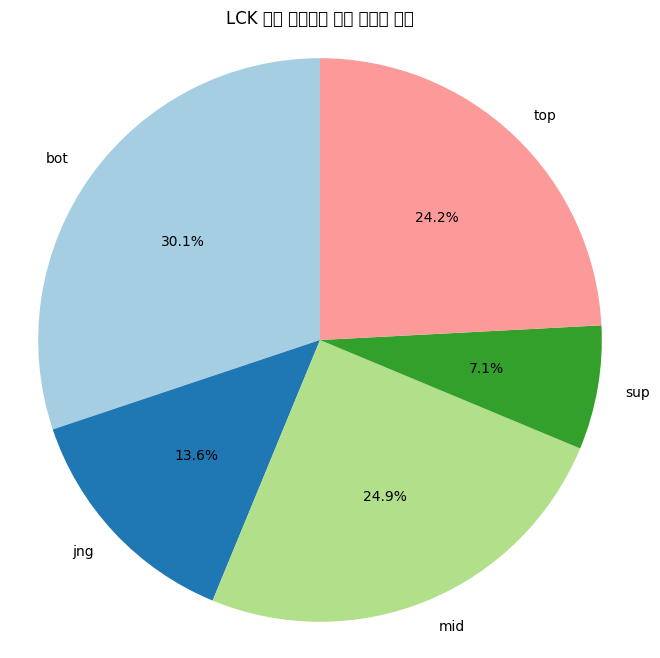

C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) 

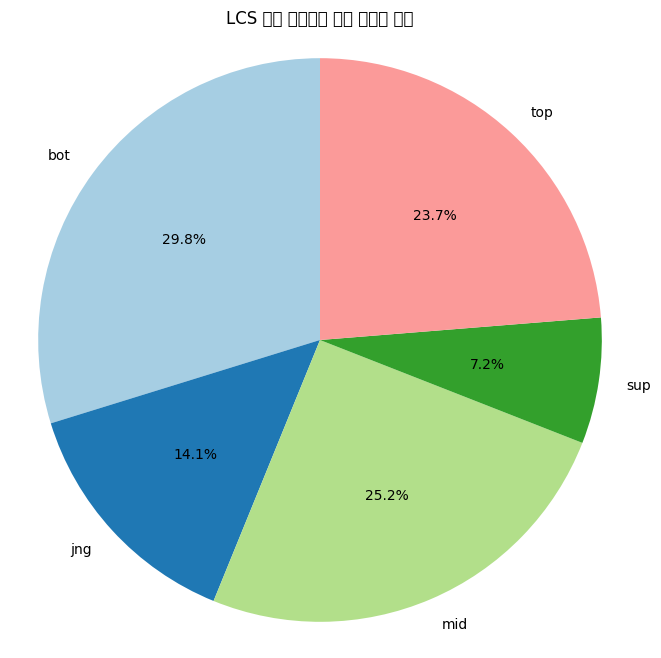

C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YOON02\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) 

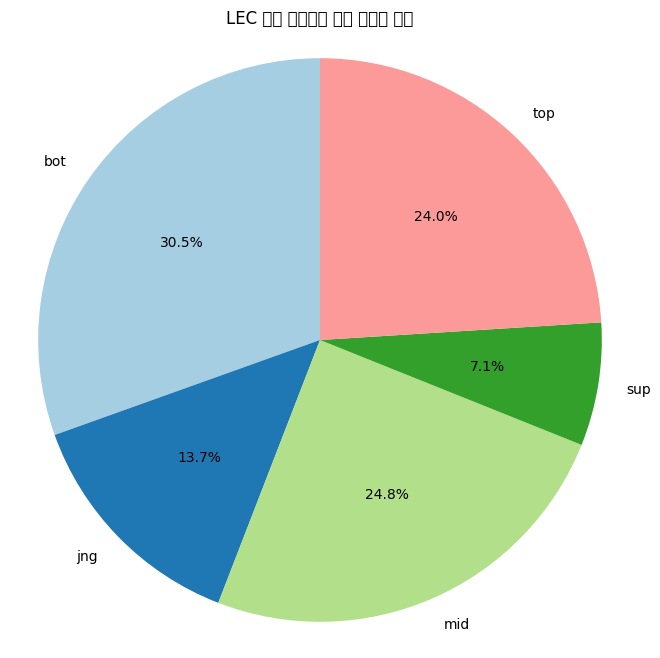

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (사용자의 파일 경로로 변경)
file_path = r"C:\Users\YOON02\Downloads\2024_민맥스.csv"
data = pd.read_csv(file_path)

# 분석할 리그 리스트 (LCK, LPL, LEC 예시)
leagues = ['LCK', 'LCS', 'LEC']

# 리그별로 승리 기여도를 합산하여 파이차트 그리기
for league in leagues:
    # 리그별 데이터 필터링
    league_data = data[data['league'] == league]
    
    # 포지션별로 총 승리 기여도 계산
    position_contribution = league_data.groupby('position')['total_win_contribution'].sum().reset_index()

    # 파이차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(position_contribution['total_win_contribution'], labels=position_contribution['position'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'{league} 리그 포지션별 승리 기여도 비율')
    plt.axis('equal')  # 원형 차트 유지
    plt.show()


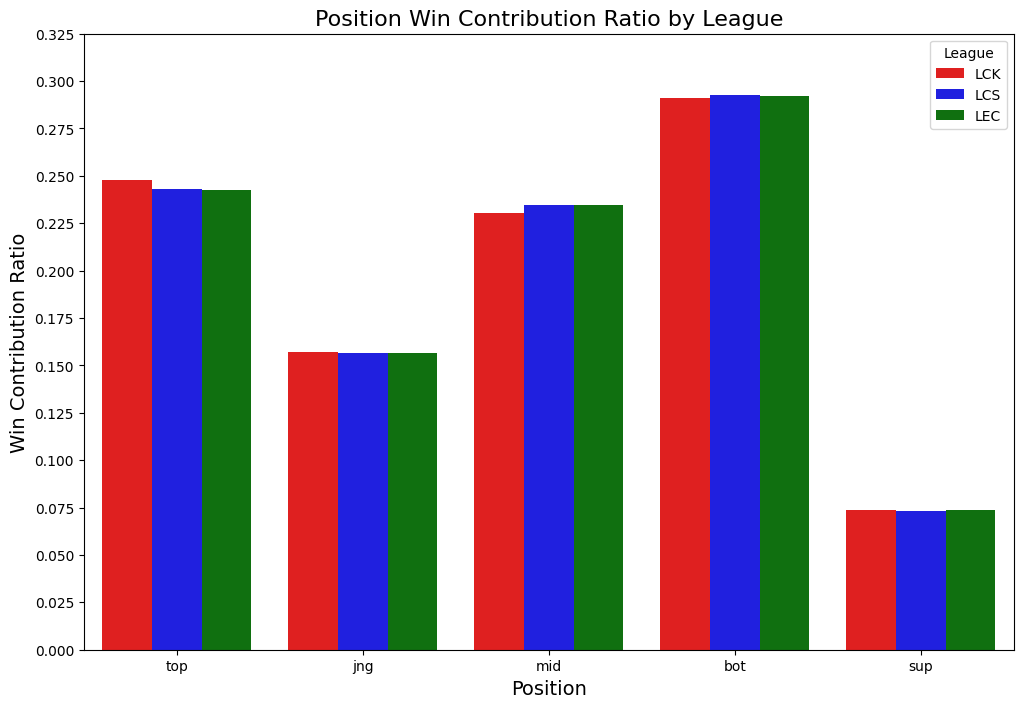

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 로드 (사용자의 파일 경로로 변경)
file_path = r"C:\Users\YOON02\Downloads\2023_민맥스_dpmd.csv"
data = pd.read_csv(file_path)

# 리그별로 포지션별 승리 기여도 합산
league_position_contribution = data.groupby(['league', 'position'])['total_win_contribution'].sum().reset_index()

# 리그별로 전체 승리 기여도 합산
league_total_contribution = data.groupby('league')['total_win_contribution'].sum().reset_index()

# 각 포지션별 승리 기여도를 리그 전체 승리 기여도 합으로 나누어 비율 계산
league_position_contribution = league_position_contribution.merge(league_total_contribution, on='league', suffixes=('', '_total'))
league_position_contribution['win_contribution_ratio'] = league_position_contribution['total_win_contribution'] / league_position_contribution['total_win_contribution_total']

# 포지션 순서 지정
position_order = ['top', 'jng', 'mid', 'bot', 'sup']
league_position_contribution['position'] = pd.Categorical(league_position_contribution['position'], categories=position_order, ordered=True)

# 색상 지정 (LCK: 빨간색, LCS: 파란색, LEC: 초록색)
custom_palette = {
    'LCK': 'red',
    'LCS': 'blue',
    'LEC': 'green'
}

# 리그별로 포지션 승리 기여도 비율을 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='position', y='win_contribution_ratio', hue='league', data=league_position_contribution, palette=custom_palette)

# y 축 눈금을 0.05 단위로 세분화
plt.yticks(np.arange(0, 0.35, 0.025))  # 0.35는 y축 최대값

# 그래프 제목 및 라벨 설정 (영어)
plt.title('Position Win Contribution Ratio by League', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Win Contribution Ratio', fontsize=14)

# 그래프 보이기
plt.legend(title='League')
plt.show()


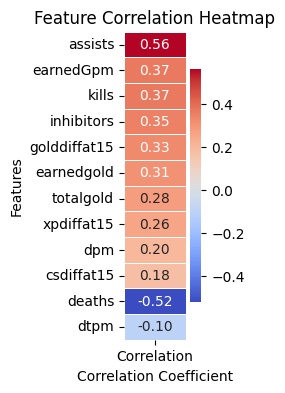

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 설정
data = {
    "피처": [
        "assists", "earnedGpm", "kills", "inhibitors", "golddiffat15", 
        "earnedgold", "totalgold", "xpdiffat15", "dpm", 
        "csdiffat15", "deaths", "dtpm"
    ],
    "Correlation": [0.56, 0.37, 0.37, 0.35, 0.33, 0.31, 0.28, 0.26, 0.2, 0.18, -0.52, -0.1]
}

# DataFrame 생성
df = pd.DataFrame(data)

# '피처'를 인덱스로 설정
df.set_index('피처', inplace=True)

# 히트맵 생성
plt.figure(figsize=(1, 4))
sns.heatmap(df, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, linewidths=.5)

# 히트맵 제목 및 축 레이블 설정
plt.title('Feature Correlation Heatmap')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# 히트맵 표시
plt.show()
